<table align="left" width=100%>
    <tr>
        <td width="15%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> Session 1 :NLP Introduction and Basics of Text Pre-processing  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Contents
1.  **[Text Normalization ](#TextNormalization)**
    - 1.1 [Case Conversion](#CaseConversion)
    - 1.2 [Spelling Correction](#SpellingCorrection)   
    - 1.3 [Stemming](#Stemming)
    - 1.4 [Parts Of Speech(POS) tagging](#POStagging)
    - 1.5 [Lemmatization](#Lemmatization)<br></br>   
2.  **[Eliminate Unessential Items from Text ](#TextElimination)**
    - 3.1 [Removing Spaces](#RemovingSpaces)
    - 3.2 [Removing Digits](#RemovingDigits)
    - 3.3 [Removing Stopwords](#RemovingStopwords)
    - 3.4 [Removing Punctuations](#RemovingPunctuations)
    - 3.5 [Removing URLs](#RemovingHTMLTags)
    - 3.6 [Removing Accented Characters](#RemovingAccentedCharacters)<br></br>   
3.  **[Working with Emoji](#WorkingwithEmoji)**<br></br>
4.  **[Web Scrapping: Text Extraction from web Page](#WebScrapping)**<br></br>
5.  **[Name Entity Recognition (NER)](#NER)**<br></br>
6.  **[Dependancy Parcing](#DependancyParcing)**<br></br>
7.  **[Word Cloud](#WordCloud)**<br></br>
8. **[Sentiment Analysis using Textblob](#SentimentAnalysis)**<br></br>

# Text Processing

<a id="TextStandardization"> </a>
### 1. Text Standardization

<a id="CaseConversion"> </a>
#### 1.1. Case Conversion

In [ ]:
# converting to lower case
text = " Lets Start learning NLP"
# python inbuild function
text = text.lower()
text

' lets start learning nlp'

<a id="SpellingCorrection"> </a>
#### 1.2. Spelling Correction

In [ ]:
!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker
def correct_spellings(text):
    spell = SpellChecker()
    corrected_words = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_words.append(spell.correction(word))
        else:
            corrected_words.append(word)
    return " ".join(corrected_words)



In [ ]:
text = "ths is a smal elepant "
print (correct_spellings(text))

the is a small elephant


<a id="Stemming"> </a>
#### 1.3 Stemming  

In [ ]:
import nltk
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

<a id="POStagging"> </a>
#### 1.4 Parts Of Speech(POS) tagging

In [ ]:
# using nltk library
import nltk
nltk.download('averaged_perceptron_tagger')
text = " You are learning NLP first lecture."
nltk.pos_tag(text.split())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('You', 'PRP'),
 ('are', 'VBP'),
 ('learning', 'VBG'),
 ('NLP', 'NNP'),
 ('first', 'RB'),
 ('lecture.', 'VBD')]

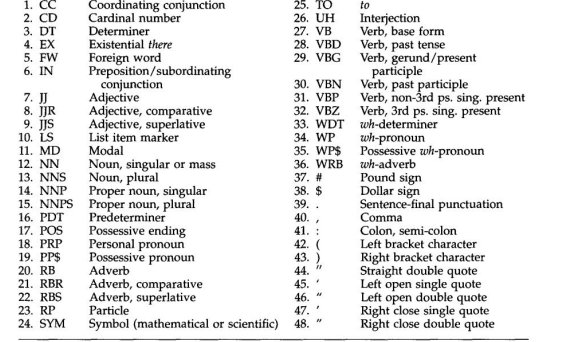

In [ ]:
# pos tagging  using spacy library
import spacy
#Load models in memory
nlp = spacy.load("en_core_web_sm")
#Process a sentence
doc = nlp('She saw a bear. She was very afraid.')
#Print POS tags for each word
for word in doc:
    print(word, word.pos_)

She PRON
saw VERB
a DET
bear NOUN
. PUNCT
She PRON
was AUX
very ADV
afraid ADJ
. PUNCT


In [ ]:
# creating dataframe of POS
import pandas as pd
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in doc]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

Word POS tag Tag type
0     She     PRP     PRON
1     saw     VBD     VERB
2       a      DT      DET
3    bear      NN     NOUN
4       .       .    PUNCT
5     She     PRP     PRON
6     was     VBD      AUX
7    very      RB      ADV
8  afraid      JJ      ADJ
9       .       .    PUNCT

<a id="Lemmatization"> </a>
#### 1.5 Lemmatization

In [ ]:
# description of each tag
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset('RB')
nltk.help.upenn_tagset('NNP')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

nltk.download('stopwords')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# lemmatization without POS specification
import nltk
from nltk.stem import WordNetLemmatizer
# nltk.download('punkt')
# nltk.download('wordnet')
#nltk.download('omw-1.4')


def lemmatize_text(text):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])


lemmatize_text("David wanted to go with Alfa but Alfa went with Charli so David is going with Bravo")


'David wanted to go with Alfa but Alfa went with Charli so David is going with Bravo'

In [ ]:
# lemmatization with POS specification
# import these modules
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
lemmatizer = WordNetLemmatizer()

# without wordnet map it takes evey word as noun
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV }


def lemma_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word ,wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

text = "David wanted to go with Alfa but Alfa went with Charli so David is going with Bravo "
lemma_words(text)

'David want to go with Alfa but Alfa go with Charli so David be go with Bravo'

<a id="TextElimination"> </a>
### 3. Eliminate Unessential Items from Text

<a id="RemovingSpaces"> </a>
#### 3.1 Removing Spaces



In [ ]:
#### Removing multiple spaces
#Comverting line with mutiple Spaces into line with single space b/w words
import re
text = "Converting line   with    many   spaces to     line with single space between words."
text = re.sub(' +',' ',text)
text

'Converting line with many spaces to line with single space between words.'

<a id="RemovingDigits"> </a>
#### 3.2 Removing Digits



In [ ]:
text ="Being no 1 in exam is more important or being no 3   with fair ways "
text= re.sub(r'[0-9]','',text)
print (text)

Being no  in exam is more important or being no    with fair ways 


<a id="RemovingStopwords"> </a>
#### 3.3 Removing Stopwords



In [ ]:
from nltk.corpus import stopwords
#nltk.download('stopwords')


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    # stop_words will contain  set all english stopwords
    filtered_sentence = []
    for word in text.split():
        if word not in stop_words:
            filtered_sentence.append(word)
    return " ".join(filtered_sentence)


In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'o', 'only', "haven't", 'after', 'very', 'its', 'be', 'other', 'm', 'up', 've', 'what', 'not', 'an', 'their', 'didn', 'just', 'at', 'me', 'been', 'again', 'this', 'our', 'once', 'it', 'into', 'is', 'by', 'before', 'wasn', 'under', 'myself', 'whom', 'during', 'any', 'he', 'she', 'nor', "isn't", 'themselves', 'which', 'will', 'should', 'that', 'below', "that'll", 'about', "didn't", 'more', "weren't", 'where', 'above', 'no', 'can', 'couldn', 'who', 't', 'aren', "aren't", 'from', 'doesn', 'how', 'through', "shan't", "wasn't", 'theirs', 'between', 'herself', 'mightn', 'a', 'to', "should've", 'll', 'you', 'my', 'and', 's', 'ma', "shouldn't", 'yourselves', 'were', 'had', 'have', 'if', 'then', "hasn't", 'until', 'here', "she's", 'won', 'doing', 'against', 'why', 'did', 'does', 'when', 'yours', 'd', 'ours', "mightn't", 'don', 'but', 'both', 'them', 'y', "you're", "it's", 'i', "you'd", 'in', 'hasn', 'while', 'each', 'are', 'the', 'with', 'than', 'him', 'same', "wouldn't", 'being', 'out', 'these

In [ ]:
text = "Stoword is one of the important topic"
text = remove_stopwords(text)
print(text)

Stoword one important topic


<a id="RemovingPunctuations"> </a>
#### 3.4 Removing Punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
text = "This! sentence, contains so: many - punctuations."
print (text)

This! sentence, contains so: many - punctuations.


In [ ]:
text_rem_pun = text.translate(str.maketrans('', '', string.punctuation))
print(text_rem_pun)

This sentence contains so many  punctuations


In [ ]:
text_rem_re_pun = re.sub(r'[^\w\s]', '', text)
print(text_rem_re_pun)

This sentence contains so many  punctuations


<a id="RemovingHTMLTags"> </a>
#### 3.5 Removing URLs

In [ ]:
text = 'Shall I search the answer in www.google.com ?'
text  = re.sub(r"https?://\S+|www\.\S+", "", text )
print(text)

Shall I search the answer in  ?


<a id="RemovingAccentedCharacters"> </a>
#### 3.6  Removing Accented Characters


In [ ]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


In [ ]:
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

<a id="WorkingwithEmoji"> </a>
### 4. Working with Emoji (*optional)


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.0 MB/s eta 0:00:00


In [ ]:
import emoji
#input data
input_text = 'He is 😳'

#Replace emoji icon with text
output_text = emoji.demojize(input_text)
output_text

'He is :flushed_face:'

In [ ]:
#Remove ':' from emoji text
output_text = output_text.replace(':','')
output_text

'He is flushed_face'


<a id="WebScrapping"> </a>
## 5. Web Scrapping: Text Extraction from web Page

- Downloding web data from websites
- Parse html/Web data
- Read the data in a Dataframe


In [ ]:
# Extracting text from websites
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the news page
url = "https://www.npr.org/sections/news/"

# Fetch the page content
response = requests.get(url) #sends an HTTP GET request
print (response.status_code)

200


In [ ]:
print(response.content)

b'<!doctype html><html class="no-js" lang="en"><head><!-- OneTrust Cookies Consent Notice start for npr.org -->\n<script type="text/javascript" src="https://cdn.cookielaw.org/consent/82089dfe-410c-4e1b-a7f9-698174b62a86/OtAutoBlock.js" ></script>\n<script src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js"  type="text/javascript" charset="UTF-8" data-domain-script="82089dfe-410c-4e1b-a7f9-698174b62a86" ></script>\n\n<script type="text/javascript">\nfunction OptanonWrapper() {\n    NPR_OptanonWrapper = true;\n    document.dispatchEvent(new CustomEvent(\'npr:DataConsentAvailable\'));\n    \n    OneTrust.OnConsentChanged(function() {\n        document.dispatchEvent(new CustomEvent(\'npr:DataConsentChanged\'));\n    });\n }\n</script>\n<!-- OneTrust Cookies Consent Notice end for npr.org -->\n<script src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript" charset="UTF-8" ccpa-opt-out-ids="C0004" ccpa-opt-out-geo="us" ccpa-opt-out-lspa="false"></script><script t

In [ ]:
print(response.text) #useful if you want to see the HTML as plain text

<!doctype html><html class="no-js" lang="en"><head><!-- OneTrust Cookies Consent Notice start for npr.org -->
<script type="text/javascript" src="https://cdn.cookielaw.org/consent/82089dfe-410c-4e1b-a7f9-698174b62a86/OtAutoBlock.js" ></script>
<script src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js"  type="text/javascript" charset="UTF-8" data-domain-script="82089dfe-410c-4e1b-a7f9-698174b62a86" ></script>

<script type="text/javascript">
function OptanonWrapper() {
    NPR_OptanonWrapper = true;
    document.dispatchEvent(new CustomEvent('npr:DataConsentAvailable'));
    
    OneTrust.OnConsentChanged(function() {
        document.dispatchEvent(new CustomEvent('npr:DataConsentChanged'));
    });
 }
</script>
<!-- OneTrust Cookies Consent Notice end for npr.org -->
<script src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript" charset="UTF-8" ccpa-opt-out-ids="C0004" ccpa-opt-out-geo="us" ccpa-opt-out-lspa="false"></script><script type="text/plain" clas

In [ ]:
soup = BeautifulSoup(response.content, "html.parser") #other parsers available, like "lxml" or "html5lib", but "html.parser" is built-in and usually sufficient

#This object allows you to easily navigate and search through the HTML content using methods like .find(), .find_all(), and CSS selectors.

In [ ]:
print(soup)

<!DOCTYPE html>
<html class="no-js" lang="en"><head><!-- OneTrust Cookies Consent Notice start for npr.org -->
<script src="https://cdn.cookielaw.org/consent/82089dfe-410c-4e1b-a7f9-698174b62a86/OtAutoBlock.js" type="text/javascript"></script>
<script charset="UTF-8" data-domain-script="82089dfe-410c-4e1b-a7f9-698174b62a86" src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript"></script>
<script type="text/javascript">
function OptanonWrapper() {
    NPR_OptanonWrapper = true;
    document.dispatchEvent(new CustomEvent('npr:DataConsentAvailable'));
    
    OneTrust.OnConsentChanged(function() {
        document.dispatchEvent(new CustomEvent('npr:DataConsentChanged'));
    });
 }
</script>
<!-- OneTrust Cookies Consent Notice end for npr.org -->
<script ccpa-opt-out-geo="us" ccpa-opt-out-ids="C0004" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript"></script><script class="optanon-category-C

Now we will Read all the articles.
For each article, we will read:
- Headline
- Article body

This is done by reading text between specific HTML tags. The tags depend on actual web page

In [ ]:
# Extract headlines and summaries
headlines = []
summaries = []

for article in soup.find_all('article'):
    headline = article.find('h2') #h2 headers are used the most often, as they break the content into smaller subsections.
    summary = article.find('p')

    if headline:
        headlines.append(headline.get_text())
    if summary:
        summaries.append(summary.get_text())

# Create a DataFrame
news_df = pd.DataFrame({
    'Headline': headlines,
    'Summary': summaries
})



In [ ]:
news_df.shape[0]

24

In [ ]:

# Display the DataFrame
news_df.sample(news_df.shape[0])

Headline  \
9   What Trump’s first days in office could be lik...   
2   Ballot measures to upend state election system...   
20  Donald Trump has chosen Susie Wiles to serve a...   
16  Notre Dame welcomes arrival of 3 new bells as ...   
1   It's legal for police to use deception in inte...   
10  Frail chimps headed from New Mexico to Louisia...   
22  With the strike over, Boeing tries to refocus ...   
18  Authorities are investigating racist text mess...   
15  Argentine prosecutors charge 3 people in conne...   
23  TB reclaims title of deadliest infectious dise...   
11  Do you have a loved one who votes differently ...   
19  Dozens of monkeys escape from South Carolina r...   
12  Honey, a new pygmy hippo just dropped! The qui...   
14  Judge strikes down Biden program shielding imm...   
6   Biden won big with young voters. This year, th...   
5   Elwood Edwards, the voice of AOL's 'You've got...   
4   Boycott men? South Korea's 4B movement gains t...   
8      Israeli soccer fans were attacked in Amsterdam   
3   ESPN host Kirk Herbstreit's beloved game day-c...   
7   Getting more light in the day and less at nigh...   
13  Why Trump won — 9 takeaways from the 2024 elec...   
0   Justice Department brings charges in an Irania...   
17  Strong winds fuel rapid spread of wildfires in...   
21  How are world economies reacting to Trump's im...   

                                              Summary  
9   \n                President-elect Donald Trump...  
2   \n                People vote at a polling sta...  
20  \n                President-elect Donald Trump...  
16  \n                A bell, center, that Olympic...  
1   \n                Ten states have recently pas...  
10  \n                TJ, 35, and Nicole, 41, came...  
22  \n                A mural of a Boeing 737 Max ...  
18  \n                The FBI says it’s aware of t...  
15  \n                A picture of former One Dire...  
23  \n                A patient who was diagnosed ...  
11  \n                Campaign signs are seen near...  
19  \n                More than 40 rhesus macaque ...  
12  \n                From left: great, late, clic...  
14  \n                President Joe Biden is shown...  
6   \n                Voters wait in line to cast ...  
5   \n                A screenshot of Elwood Edwar...  
4   \n                Search interest and social m...  
8   \n                In an image taken from video...  
3   \n                ESPN's Kirk Herbstreit and h...  
7   \n                Dark nights and light days p...  
13  \n                Former President Donald Trum...  
0   \n                Former President Donald Trum...  
17  \n                A firefighter prepares to do...  
21  \n                International newspapers rep...

###Handling Dynamic Content:

Some websites use JavaScript to load content. BeautifulSoup may not see this content.
In such cases, consider using tools like Selenium or Playwright for web scraping.


<a id="NER"> </a>
### 6. Name Entity Recognition (NER)  

- Detecting the Entities from the text and Classifying Entities into different categories
- NER usage example
    - Topic Modeling : understand text is by analyzing its topics
    - Text Summarization


In [ ]:
import spacy

# spacy is prefered for NER
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()


text = '''European authorities fined Google a record $5.1 billion on Wednesday for
abusing its power in the mobile phone market and ordered the company to alter its practices'''

doc = nlp(text)
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


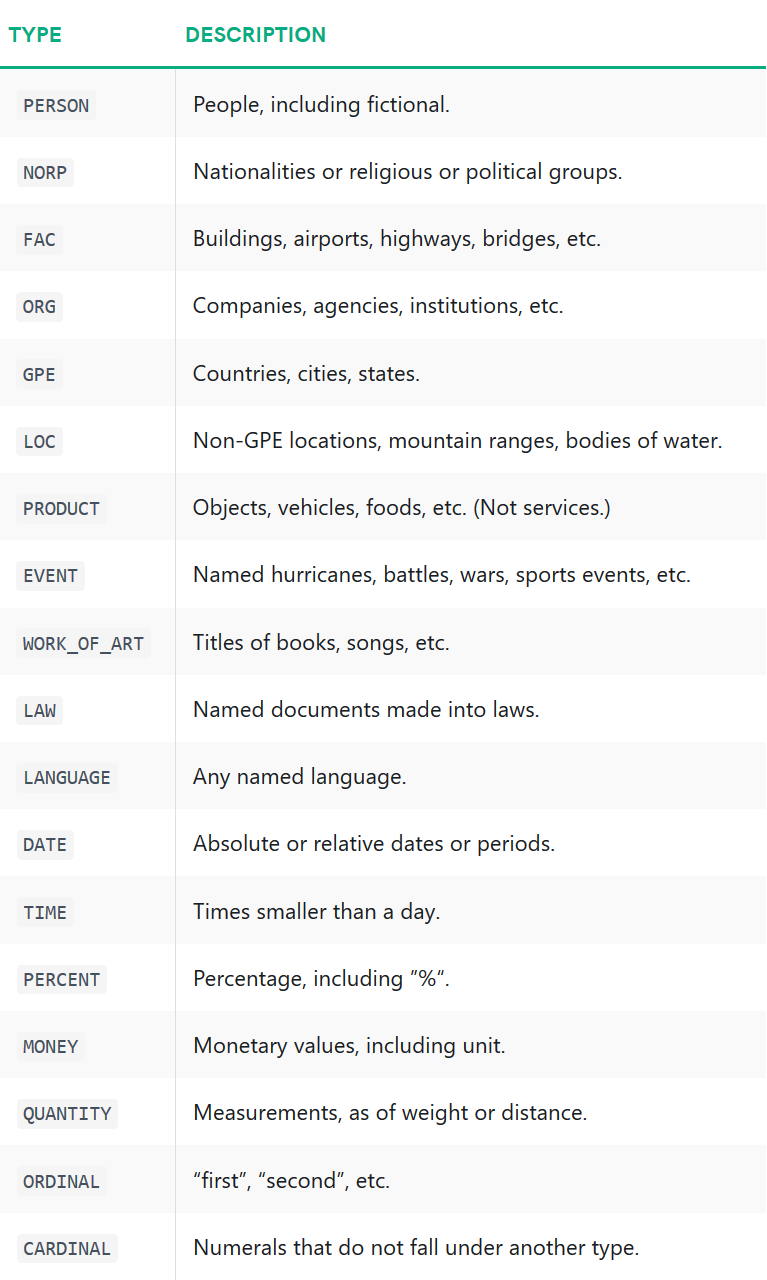

European is NORP (nationalities or religious or political groups), Google is an organization, $5.1 billion is monetary value and Wednesday is a date object. They are all correct.


- Fetching sentences
- Fetching tokens
- Extracting named entity from an article

In [ ]:
# imports and load spacy english language package
import spacy
from spacy import displacy
from spacy import tokenizer
nlp = spacy.load('en_core_web_sm')

text ='''Python is an interpreted, high-level and general-purpose programming language
       Pythons design philosophy emphasizes code readability with"
       its notable use of significant indentation."
       Its language constructs and object-oriented approach aim to"
       help programmers write clear and"
       logical code for small and large-scale projects'''
print(text)


Python is an interpreted, high-level and general-purpose programming language
       Pythons design philosophy emphasizes code readability with"
       its notable use of significant indentation."
       Its language constructs and object-oriented approach aim to"
       help programmers write clear and"
       logical code for small and large-scale projects


In [ ]:
# Fetching sentences
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)


[Python is an interpreted, high-level and general-purpose programming language
       Pythons design philosophy emphasizes code readability with"
       its notable use of significant indentation., "
       Its language constructs and object-oriented approach aim to"
       help programmers write clear and"
       logical code for small and large-scale projects]


In [ ]:
#Fetching tokens
for token in doc:
    print(token.text)

Python
is
an
interpreted
,
high
-
level
and
general
-
purpose
programming
language

       
Pythons
design
philosophy
emphasizes
code
readability
with
"

       
its
notable
use
of
significant
indentation
.
"

       
Its
language
constructs
and
object
-
oriented
approach
aim
to
"

       
help
programmers
write
clear
and
"

       
logical
code
for
small
and
large
-
scale
projects


#### NER usage :

In [ ]:
text = '''Barack Obama is an American politician who served as the 44th President of the United States
from 2009 to 2017.He is the first African American to have served as president,
as well as the first born outside the contiguous United States. He speaks English.'''

doc3 = nlp(text)
displacy.render(doc3, style="ent", jupyter=True)

<a id="DependancyParcing"> </a>
### 8. Dependancy Parcing

- Process of analyzing grammatical structure in a sentence and find out related words as well & type of the relationship between them.


In [ ]:
#Visualize dependecy parsing
from spacy import displacy
#For 1st sentence
doc = nlp('She saw a bear. She was very afraid.')
# doc
displacy.render(doc, style="dep")

<a id="WordCloud"> </a>
### 9. Word Cloud

In [ ]:
#! pip install wordcloud
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

# import the wordcloud library
from wordcloud import WordCloud,STOPWORDS

# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
#          background_color='white',
        stopwords = stopwords)

# Apply the wordcloud to the text.
text = '''Barack Obama is an American politician who served as the 44th President of the United States
from 2009 to 2017.He is the first African American to have served as president,
as well as the first born outside the contiguous United States. He speaks English.'''

wordcloud.generate(text)



(-0.5, 599.5, 299.5, -0.5)

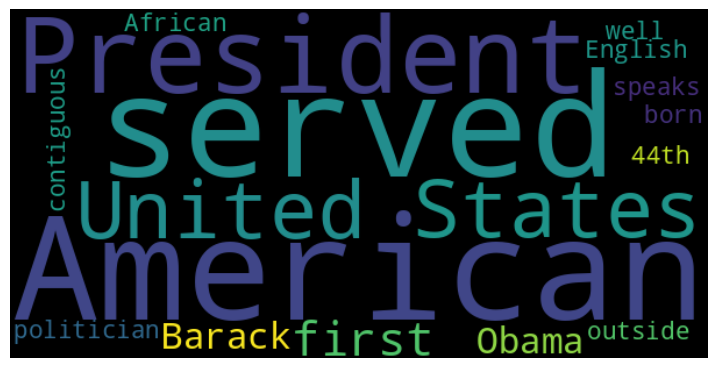

In [ ]:
# ploting wordcloud
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

<a id="SentimentAnalysis"> </a>
### 10. Sentiment Analysis using Textblob


In [ ]:
from textblob import TextBlob

text = "I hate anything that goes in my ear"
textblob = TextBlob(text)

In [ ]:
# fetching text sentiment polarity
textblob.sentiment.polarity

-0.8

In [ ]:
# fetching text sentiment subjectivity
textblob.sentiment.subjectivity

0.9

In [ ]:
# function for analysis sentiment
# def getTextAnalysis(a):
#     if a < 0:
#         return "Negative"
#     elif a == 0:
#         return "Neutral"
#     else:
#         return "Positive"
